In [83]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

#Read in the data

df = pd.read_csv(r'C:\Users\Admin\Downloads\movies.csv',
    encoding="latin1")

#Let's look at the data

df.head(10)

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick   
1       July 2, 1980 (United States)    5.8    65000.0      Randal Kleiser   
2      June 20, 1980 (United States)    8.7  1200000.0      Irvin Kershner   
3       July 2, 1980 (United States)    7.7   221000.0        Jim Abrahams   
4      July 25, 1980 (United States)    7.3   108000.0        Harold Ramis   
5        May 9, 1980 (United States)    6.4   123000.0  Sean S. Cunningham   
6      June 20, 1980 (United States)    7.9   188000.0         John Landis   
7  December 19, 1980 (United States)    8.2   330000.0     Martin Scorsese   
8      June 19, 1981 (United States)    6.8   101000.0      Richard Lester   
9       May 16, 1980 (United States)    7.0    10000.0         Walter Hill   

                    writer             star         country      budget  \
0             Stephen King   Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole   Brooke Shields   United States   4500000.0   
2           Leigh Brackett      Mark Hamill   United States  18000000.0   
3             Jim Abrahams      Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray      Chevy Chase   United States   6000000.0   
5            Victor Miller     Betsy Palmer   United States    550000.0   
6              Dan Aykroyd     John Belushi   United States  27000000.0   
7             Jake LaMotta   Robert De Niro   United States  18000000.0   
8             Jerry Siegel     Gene Hackman   United States  54000000.0   
9              Bill Bryden  David Carradine   United States  10000000.0   

         gross                       company  runtime  
0   46998772.0                  Warner Bros.    146.0  
1   58853106.0             Columbia Pictures    104.0  
2  538375067.0                     Lucasfilm    124.0  
3   83453539.0            Paramount Pictures     88.0  
4   39846344.0                Orion Pictures     98.0  
5   39754601.0            Paramount Pictures     95.0  
6  115229890.0            Universal Pictures    133.0  
7   23402427.0  Chartoff-Winkler Productions    129.0  
8  108185706.0                Dovemead Films    127.0  
9   15795189.0                United Artists    100.0

In [84]:
# We need to see if we have any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} , {}%'.format(col, pct_missing))
    
    

name , 0.0%
rating , 0.010041731872717789%
genre , 0.0%
year , 0.0%
released , 0.0002608242044861763%
score , 0.0003912363067292645%
votes , 0.0003912363067292645%
director , 0.0%
writer , 0.0003912363067292645%
star , 0.00013041210224308815%
country , 0.0003912363067292645%
budget , 0.2831246739697444%
gross , 0.02464788732394366%
company , 0.002217005738132499%
runtime , 0.0005216484089723526%


In [85]:
#data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [86]:
#

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [87]:
#Get rid of duplicates

df.drop_duplicates()

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663          0                        NaN     90.0  
7664          0  Cactus Blue Entertainment     90.0  
7665          0           Embi Productions      NaN  
7666          0                        NaN    120.0  
7667          0                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [88]:
#Create correct year column

df['released'] = df['released'].fillna(0).astype(str)
df['year_correct'] = df['released'].str.split(',').str[1].str.strip().str[:4]

df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States         0   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa         0   

          gross                    company  runtime year_correct  
0      46998772               Warner Bros.    146.0         1980  
1      58853106          Columbia Pictures    104.0         1980  
2     538375067                  Lucasfilm    124.0         1980  
3      83453539         Paramount Pictures     88.0         1980  
4      39846344             Orion Pictures     98.0         1980  
...         ...                        ...      ...          ...  
7663          0                        NaN     90.0         2020  
7664          0  Cactus Blue Entertainment     90.0         2020  
7665          0           Embi Productions      NaN         2020  
7666          0                        NaN    120.0         2020  
7667          0                PK 65 Films    102.0         2020  

[7668 rows x 16 columns]

In [89]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [66]:
#Drop any duplicates

#df['company'].drop_duplicates().sort_values(ascending=False) #shows unique values of companies

df.drop_duplicates()

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [90]:
df.head()

name rating   genre  year  \
5445                                      Avatar  PG-13  Action  2009   
7445                           Avengers: Endgame  PG-13  Action  2019   
3045                                     Titanic  PG-13   Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13  Action  2015   
7244                      Avengers: Infinity War  PG-13  Action  2018   

                               released  score      votes       director  \
5445  December 18, 2009 (United States)    7.8  1100000.0  James Cameron   
7445     April 26, 2019 (United States)    8.4   903000.0  Anthony Russo   
3045  December 19, 1997 (United States)    7.8  1100000.0  James Cameron   
6663  December 18, 2015 (United States)    7.8   876000.0    J.J. Abrams   
7244     April 27, 2018 (United States)    8.4   897000.0  Anthony Russo   

                  writer               star        country     budget  \
5445       James Cameron    Sam Worthington  United States  237000000   
7445  Christopher Markus  Robert Downey Jr.  United States  356000000   
3045       James Cameron  Leonardo DiCaprio  United States  200000000   
6663     Lawrence Kasdan       Daisy Ridley  United States  245000000   
7244  Christopher Markus  Robert Downey Jr.  United States  321000000   

           gross                company  runtime year_correct  
5445  2847246203  Twentieth Century Fox    162.0         2009  
7445  2797501328         Marvel Studios    181.0         2019  
3045  2201647264  Twentieth Century Fox    194.0         1997  
6663  2069521700              Lucasfilm    138.0         2015  
7244  2048359754         Marvel Studios    149.0         2018

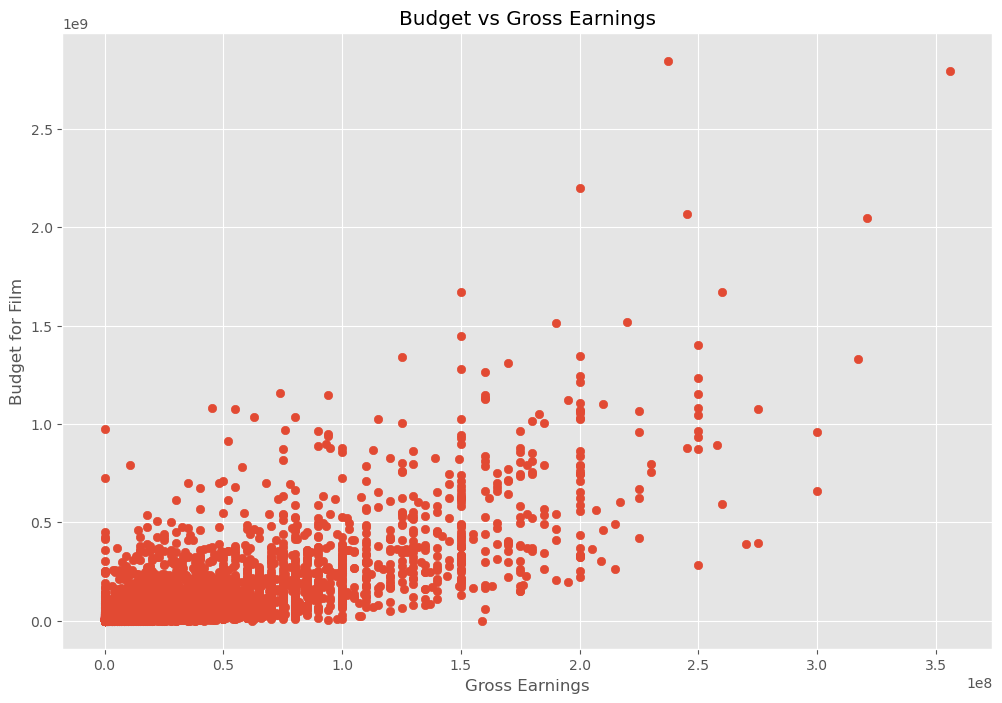

In [91]:
#Scatter plot budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

<Axes: xlabel='budget', ylabel='gross'>

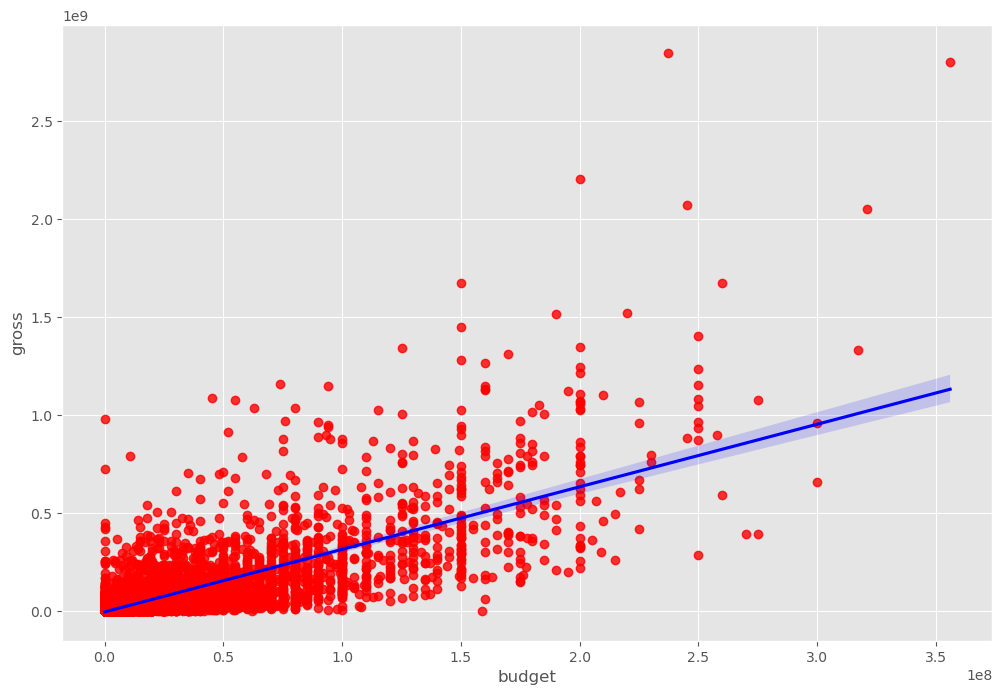

In [93]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

In [94]:
#Let's start looking at correlation

df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

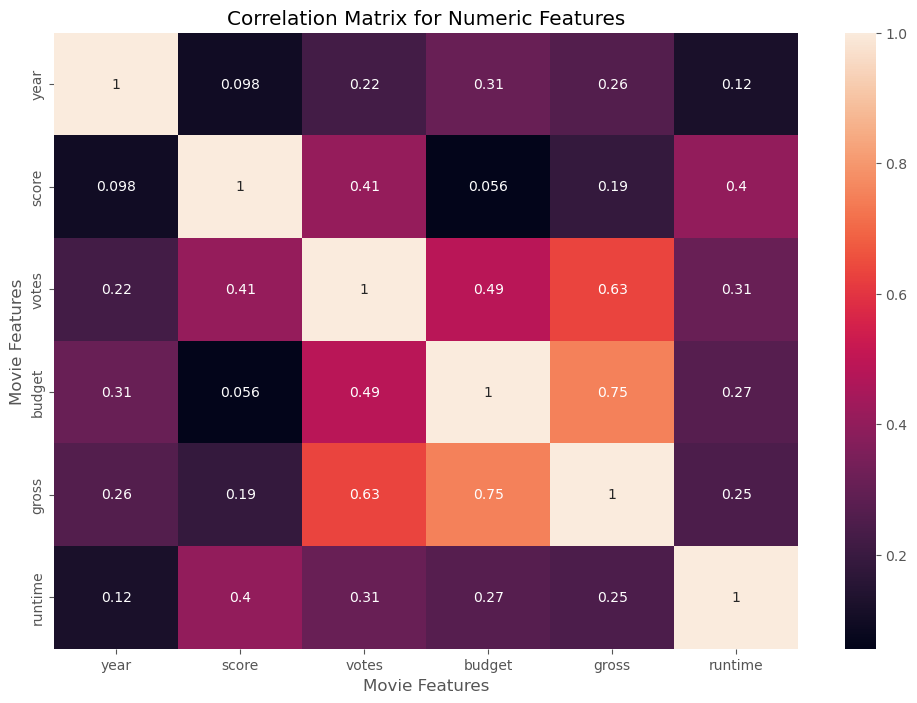

In [96]:
#dsd

correlation_matrix = df.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [97]:
#Label encode company names into numeric IDs

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

name  rating  genre  year  released  score      votes  director  writer  \
5445   533       5      0  2009       697    7.8  1100000.0      1155    1778   
7445   535       5      0  2019       184    8.4   903000.0       162     743   
3045  6896       5      6  1997       705    7.8  1100000.0      1155    1778   
6663  5144       5      0  2015       699    7.8   876000.0      1125    2550   
7244   536       5      0  2018       193    8.4   897000.0       162     743   

      star  country     budget       gross  company  runtime  year_correct  
5445  2334       55  237000000  2847246203     2253    162.0            29  
7445  2241       55  356000000  2797501328     1606    181.0            39  
3045  1595       55  200000000  2201647264     2253    194.0            17  
6663   524       55  245000000  2069521700     1540    138.0            35  
7244  2241       55  321000000  2048359754     1606    149.0            38

In [98]:
# OR : Using factorize - this assigns a random numeric value for each unique categorical value

df_numerized.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name          1.000000  0.344565  0.138267  0.253910  0.656335  0.107080   
rating        0.344565  1.000000 -0.014784  0.036004  0.263707 -0.069097   
genre         0.138267 -0.014784  1.000000  0.087977  0.090933  0.063222   
year          0.253910  0.036004  0.087977  1.000000  0.315373  0.076737   
released      0.656335  0.263707  0.090933  0.315373  1.000000  0.069431   
score         0.107080 -0.069097  0.063222  0.076737  0.069431  1.000000   
votes         0.595719  0.154219  0.148217  0.326465  0.449888  0.233671   
director      0.720208  0.284009  0.093337  0.173209  0.502111  0.149737   
writer        0.783080  0.303192  0.088078  0.212413  0.546895  0.103836   
star          0.653381  0.303992  0.099530  0.228041  0.476605  0.107096   
country       0.193790  0.199683 -0.072434 -0.055861  0.163323 -0.095521   
budget        0.111328  0.083532  0.101206  0.060264  0.080302  0.001095   
gross         0.978147  0.351587  0.134001  0.266957  0.669824  0.113338   
company       0.686232  0.334657  0.057535  0.123347  0.467333  0.037368   
runtime       0.071788  0.033714  0.005608  0.032915  0.046158  0.035619   
year_correct  0.256431  0.028958  0.085155  0.935420  0.331139  0.083827   

                 votes  director    writer      star   country    budget  \
name          0.595719  0.720208  0.783080  0.653381  0.193790  0.111328   
rating        0.154219  0.284009  0.303192  0.303992  0.199683  0.083532   
genre         0.148217  0.093337  0.088078  0.099530 -0.072434  0.101206   
year          0.326465  0.173209  0.212413  0.228041 -0.055861  0.060264   
released      0.449888  0.502111  0.546895  0.476605  0.163323  0.080302   
score         0.233671  0.149737  0.103836  0.107096 -0.095521  0.001095   
votes         1.000000  0.495131  0.521166  0.452379  0.050905  0.038468   
director      0.495131  1.000000  0.696209  0.581080  0.195438  0.043503   
writer        0.521166  0.696209  1.000000  0.590738  0.198945  0.064211   
star          0.452379  0.581080  0.590738  1.000000  0.220053  0.067042   
country       0.050905  0.195438  0.198945  0.220053  1.000000 -0.060816   
budget        0.038468  0.043503  0.064211  0.067042 -0.060816  1.000000   
gross         0.611778  0.737284  0.797866  0.669962  0.194529  0.107241   
company       0.392701  0.616907  0.618763  0.573646  0.257758  0.065301   
runtime       0.067644  0.080139  0.057804  0.074058  0.014816  0.063779   
year_correct  0.324699  0.175330  0.209812  0.232559 -0.053951  0.058939   

                 gross   company   runtime  year_correct  
name          0.978147  0.686232  0.071788      0.256431  
rating        0.351587  0.334657  0.033714      0.028958  
genre         0.134001  0.057535  0.005608      0.085155  
year          0.266957  0.123347  0.032915      0.935420  
released      0.669824  0.467333  0.046158      0.331139  
score         0.113338  0.037368  0.035619      0.083827  
votes         0.611778  0.392701  0.067644      0.324699  
director      0.737284  0.616907  0.080139      0.175330  
writer        0.797866  0.618763  0.057804      0.209812  
star          0.669962  0.573646  0.074058      0.232559  
country       0.194529  0.257758  0.014816     -0.053951  
budget        0.107241  0.065301  0.063779      0.058939  
gross         1.000000  0.698374  0.072440      0.269415  
company       0.698374  1.000000  0.057951      0.126548  
runtime       0.072440  0.057951  1.000000      0.026353  
year_correct  0.269415  0.126548  0.026353      1.000000

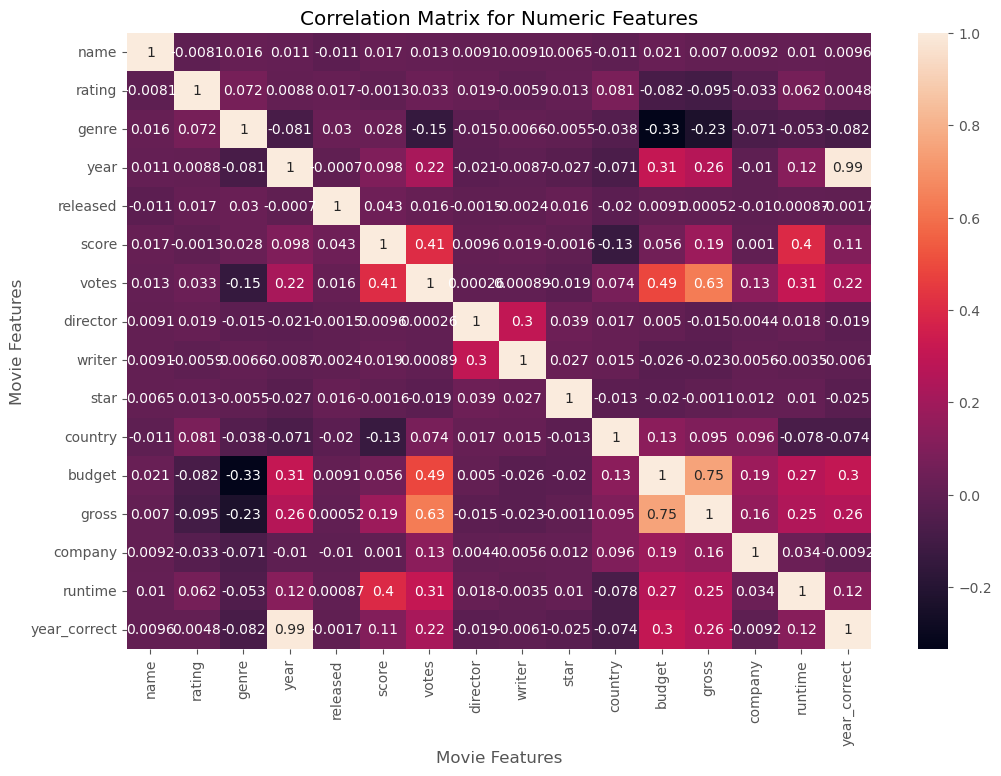

In [99]:


correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [106]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

with pd.option_context('display.max_rows', None):
    print(corr_pairs)

corr_pairs

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
              score           0.017097
              votes           0.013088
              director        0.009079
              writer          0.009081
              star            0.006472
              country        -0.010737
              budget          0.020548
              gross           0.006989
              company         0.009211
              runtime         0.010392
              year_correct    0.009553
rating        name           -0.008069
              rating          1.000000
              genre           0.072423
              year            0.008779
              released        0.016613
              score          -0.001314
              votes           0.033225
              director        0.019483
              writer         -0.005921
              star       

name          name            1.000000
              rating         -0.008069
              genre           0.016355
              year            0.011453
              released       -0.011311
                                ...   
year_correct  budget          0.302266
              gross           0.256266
              company        -0.009185
              runtime         0.121534
              year_correct    1.000000
Length: 256, dtype: float64

In [107]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre         budget         -0.334021
budget        genre          -0.334021
gross         genre          -0.234297
genre         gross          -0.234297
              votes          -0.145307
                                ...   
star          star            1.000000
company       company         1.000000
gross         gross           1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [108]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross         votes           0.632834
votes         gross           0.632834
gross         budget          0.750157
budget        gross           0.750157
year          year_correct    0.992136
                                ...   
star          star            1.000000
company       company         1.000000
gross         gross           1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 22, dtype: float64